In [ ]:
from langchain_community.tools import  ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper


: 

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("Attention is all you need")

'Published: 2021-05-06\nTitle: Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet\nAuthors: Luke Melas-Kyriazi\nSummary: The strong performance of vision transformers on image classification and other vision tasks is often attributed to the design of their multi-head attention layers. However, the extent to which attention is responsible for this strong performance remains unclear. In this short report, we ask: is the attention layer even necessary? Specifi'

In [4]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)


wikipedia


In [5]:
from dotenv import load_dotenv
load_dotenv()

import os
API_KEY=os.getenv("API_KEY")

os.environ["TAVILY_API_KEY"]=os.getenv("tvapikey")


In [18]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [7]:
tavily.invoke("Provide me the recent AI new?")

[{'url': 'https://www.artificialintelligence-news.com/',
  'content': '### Zara’s use of AI shows how retail workflows are quietly changing\n\nDeep Dives\n\nDecember 19, 2025\n\n### Roblox brings AI into the Studio to speed up game creation\n\nAI in Action\n\nDecember 17, 2025\n\n#### Industries\n\n### Disney is embedding generative AI into its operating model\n\nEntertainment & Media\n\nDecember 24, 2025\n\n### Arm and the future of AI at the edge\n\nAI Hardware & Chips\n\nDecember 23, 2025\n\n### Marketing agencies using AI in workflows serve more clients\n\nMarketing AI [...] October 30, 2025\n\n### Malaysia launches Ryt Bank, its first AI-powered bank\n\nFinance AI\n\nAugust 26, 2025\n\n### Google’s Veo 3 AI video creation tools are now widely available\n\nAI in Action\n\nJuly 29, 2025\n\n#### Computer Vision\n\n### US and Japan announce sweeping AI and tech collaboration\n\nArtificial Intelligence\n\nApril 11, 2024\n\n### UK and Canada sign AI compute agreement\n\nArtificial Intel

In [9]:
tools=[arxiv,wiki,tavily]


In [14]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4.1",base_url="https://openrouter.ai/api/v1",api_key=API_KEY,max_tokens=500)

ImportError: cannot import name 'ModelProfileRegistry' from 'langchain_core.language_models' (c:\Users\Rayan Ahmed.R\Downloads\Agentic\.venv\lib\site-packages\langchain_core\language_models\__init__.py)

In [12]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model


# Initialize Groq chat model using the API key
groq_api_key=os.getenv("groqkey")
chat = GroqChat(api_key=groq_api_key)

# Example usage
response = chat.predict("Hello, how are you?")
print(response)


ImportError: cannot import name 'ModelProfile' from 'langchain_core.language_models' (c:\Users\Rayan Ahmed.R\Downloads\Agentic\.venv\lib\site-packages\langchain_core\language_models\__init__.py)

In [11]:
llm.invoke("What is AI?")

AIMessage(content='**AI** stands for **Artificial Intelligence**. It refers to the ability of machines or computer programs to perform tasks that typically require human intelligence. This includes learning, reasoning, problem-solving, perception, understanding language, recognizing patterns, and sometimes even creativity.\n\n### Key Points:\n- **Artificial**: Made by humans, not natural.\n- **Intelligence**: Ability to think, learn, and make decisions.\n\n### Common Types of AI:\n- **Narrow AI (Weak AI):** Does specific tasks (e.g., voice assistants like Siri, chatbots).\n- **General AI (Strong AI):** Would do any intellectual task that a human can (this does not yet exist).\n\n### Examples of AI in Everyday Life:\n- Virtual assistants (Alexa, Siri, Google Assistant)\n- Recommendation systems (Netflix, YouTube)\n- Self-driving cars\n- Face recognition in smartphones\n- Chatbots (like me!)\n\n### How Does AI Work?\nAI often uses:\n- **Data:** Lots of information to learn from\n- **Algo

In [12]:
llm_with_tools=llm.bind_tools(tools=tools)

In [14]:
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8jGIbR0JzJGFmTh0LLTCNgjI', 'function': {'arguments': '{"query":"recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function', 'index': 0}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 165, 'total_tokens': 187, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 0.000506, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 0.00033, 'upstream_inference_completions_cost': 0.000176}}, 'model_name': 'openai/gpt-4.1', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7b1db064-4287-4567-965f-e364a8253487-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {

In [15]:
llm_with_tools.invoke("What is the latest research on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_uM7CZa3gfVTRphZUCJXBKVUL', 'function': {'arguments': '{"query":"quantum computing"}', 'name': 'arxiv'}, 'type': 'function', 'index': 0}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 166, 'total_tokens': 183, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 0.000468, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 0.000332, 'upstream_inference_completions_cost': 0.000136}}, 'model_name': 'openai/gpt-4.1', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-307f63c0-034e-40ff-8fda-e85a0eee0708-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'cal

In [ ]:
llm_with_tools.invoke("what is machine learning?")


AIMessage(content='**Machine learning** is a branch of artificial intelligence (AI) that focuses on developing algorithms and statistical models that enable computers to learn from and make predictions or decisions based on data, without being explicitly programmed for each specific task.\n\n### Key Points:\n- **Learning from Data:** Machine learning systems improve their performance as they are exposed to more data.\n- **Types of Machine Learning:**\n  - **Supervised Learning:** The algorithm is trained on labeled data (data with correct answers).\n  - **Unsupervised Learning:** The algorithm finds patterns or structures in data that is not labeled.\n  - **Reinforcement Learning:** The algorithm learns by receiving feedback based on its actions (rewards or punishments).\n- **Applications:** Machine learning is used in a wide range of fields, including speech recognition, image analysis, self-driving cars, medical diagnosis, and more.\n\n**In short**, machine learning enables computers

In [17]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages


In [18]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]
    

In [19]:
from IPython.display import Image,display
from langgraph.graph import StateGraph , START , END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

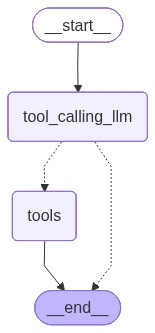

In [23]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}
builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## edges
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
builder.add_edge("tools",END)

graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_dly1ogFBQJR1UrP44DvuZj9o)
 Call ID: call_dly1ogFBQJR1UrP44DvuZj9o
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, base
